In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import math
import random

In [7]:
filepath = input("Please enter the pathname of the xlsx e.g C:/Users/new/Desktop/thisone.xlsx \n")
filepath

Please enter the pathname of the xlsx e.g C:/Users/new/Desktop/thisone.xlsx 
C:/Users/new/Desktop/thisone.xlsx


'C:/Users/new/Desktop/thisone.xlsx'

In [8]:
df = pd.read_excel(value, header=None)
print (df)

               0
0     4335186017
1     4961400439
2     5213047711
3     5895278024
4     6669673257
5     7689154053
6     8591517944
7     9275600800
8    10090675903
9    11615657031
10   13139863636
11   14591750000
12   16885511364
13   22347848101
14   25351306818
15   28525876727
16   31152835821
17   36176234968
18   44270204082
19   54481876725
20   56829664269
21   52346506765
22   54617989796
23   49428873839
24   48020024184
25   47820851221
26   56379593476
27   65652750377
28   76261277925
29   79169043223
..           ...
31  105143000000
32  116225000000
33  108809000000
34  116602000000
35  136878000000
36  145862000000
37  143158000000
38  144428000000
39  142541000000
40  130134000000
41  136191000000
42  153831000000
43  201924000000
44  240521000000
45  247783000000
46  273318000000
47  318498000000
48  354461000000
49  330000000000
50  296835000000
51  282626000000
52  242054000000
53  238484000000
54  235295000000
55  195318000000
56  192732000000
57  1996310000

In [9]:
def getlastdigits(num):
    if type(num) is int:
        return num%100
    elif type(num) is float:
        return int(num*100)%100
    return 'error'

In [10]:
def getfrequency_percentage(data,digits):
    frequency = []
    for i in digits:
        count = data.count(i)
        frequency.append(count)
    total=sum(frequency)
    frequency_percentage = frequency
    for i in range(len(frequency)):
        frequency_percentage[i] = (frequency[i]/total)*100
    return frequency_percentage

In [11]:
data2 = list(df[0])
last_digits = data2
for i in range(len(data2)):
    last_digits[i] = getlastdigits(data2[i])    

In [12]:
data=list(df[0])
for i in range(len(data)):
    while data[i]>10:
        data[i]=data[i]/10
            

In [13]:
data3 = list(df[0])
for i in range(len(data3)):
    while data3[i]>100:
        data3[i]=data3[i]/10

In [14]:
first_digits=data
i=0
for i in range(len(data)):
    first_digits[i]=int(data[i])
    i = i+1

In [15]:
second_digits = data3
i = 0
for i in range(len(data3)):
    second_digits[i] = int(data3[i])%10
    i = i+1 

In [16]:
digits={1,2,3,4,5,6,7,8,9}
digits

{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
frequency_percentage=getfrequency_percentage(first_digits,digits)

In [18]:
benfords_percentages = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

In [19]:
chi_square_stat = 0
i=0
for i in range(len(frequency_percentage)):
        chi_square =(frequency_percentage[i] - benfords_percentages[i])**2
        chi_square_stat = chi_square_stat + chi_square/benfords_percentages[i]
        i=i+1
chi_square_stat        

9.959099679883145

In [20]:
print("observed frequencies")
print(frequency_percentage)
print("benfords percentages")
print(benfords_percentages)
print("critical value is 15.507 and the chi_square_stat is "+ str(chi_square_stat))
#critical value with df=8 and p value 0.05 is 15.507
if chi_square_stat < 15.507:
    print("the distribution of the numbers match the expected benfords distribution")
else:
    print("the distribution of the numbers does not match the expected benfords distribution")

observed frequencies
[34.42622950819672, 22.950819672131146, 8.19672131147541, 9.836065573770492, 11.475409836065573, 3.278688524590164, 4.918032786885246, 1.639344262295082, 3.278688524590164]
benfords percentages
[30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
critical value is 15.507 and the chi_square_stat is 9.959099679883145
the distribution of the numbers match the expected benfords distribution


In [21]:
digitspluszero ={0,1,2,3,4,5,6,7,8,9}
frequency_percentage_of_second_digit= getfrequency_percentage(second_digits,digitspluszero)
frequency_percentage_of_second_digit

[8.19672131147541,
 9.836065573770492,
 6.557377049180328,
 13.114754098360656,
 18.0327868852459,
 8.19672131147541,
 11.475409836065573,
 4.918032786885246,
 8.19672131147541,
 11.475409836065573]

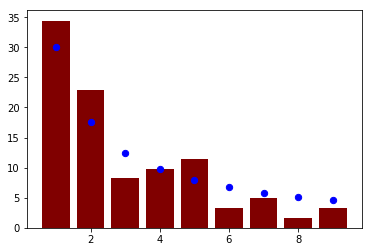

In [22]:
plt.bar([1,2,3,4,5,6,7,8,9],frequency_percentage,color ='maroon',zorder =1 )
plt.scatter([1,2,3,4,5,6,7,8,9],benfords_percentages, color='b', s=40,zorder=2)
plt.show()

In [23]:
benfords_second = [11.96, 11.38, 10.88, 10.43, 10.03, 9.6, 9.3, 9.0, 8.7, 8.5]

In [24]:
chi_square_stat2 = 0
i=0
for i in range(len(frequency_percentage_of_second_digit)):
        chi_square =(frequency_percentage_of_second_digit[i] - benfords_second[i])**2
        chi_square_stat2 = chi_square_stat2 + chi_square/benfords_second[i]
        i=i+1
chi_square_stat2   

13.82337854825915

In [25]:
print("observed frequencies of second digit")
print(frequency_percentage_of_second_digit)
print("benfords percentages")
print(benfords_second)
print("critical value is 16.919 and the chi_square_stat is "+ str(chi_square_stat2))
#critical value with df=8 and p value 0.05 is 16.919
if chi_square_stat2 < 16.919:
    print("the distribution of the numbers match the expected benfords distribution")
else:
    print("the distribution of the numbers does not match the expected benfords distribution")

observed frequencies of second digit
[8.19672131147541, 9.836065573770492, 6.557377049180328, 13.114754098360656, 18.0327868852459, 8.19672131147541, 11.475409836065573, 4.918032786885246, 8.19672131147541, 11.475409836065573]
benfords percentages
[11.96, 11.38, 10.88, 10.43, 10.03, 9.6, 9.3, 9.0, 8.7, 8.5]
critical value is 16.919 and the chi_square_stat is 13.82337854825915
the distribution of the numbers match the expected benfords distribution


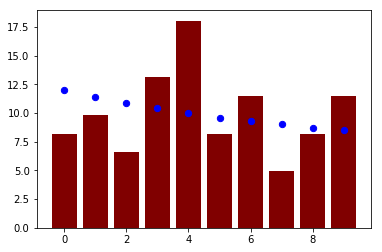

In [26]:
plt.bar([0,1,2,3,4,5,6,7,8,9],frequency_percentage_of_second_digit,color ='maroon',zorder =1 )
plt.scatter([0,1,2,3,4,5,6,7,8,9],benfords_second, color='b', s=40,zorder=2)
plt.show()

In [27]:
random_double_digits = last_digits
for i in range (len(random_double_digits)):
    random_double_digits[i] = random.randint(0,99)

how barplot of random data should look like


<BarContainer object of 100 artists>

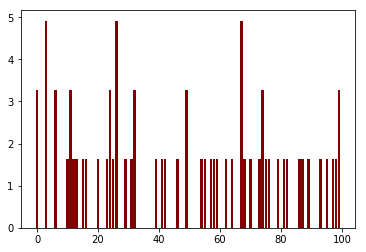

In [28]:
print("how barplot of random data should look like")
plt.bar(list(range(0,100)),getfrequency_percentage(random_double_digits,list(range(0,100))),color ='maroon' )

how your data look like


<BarContainer object of 100 artists>

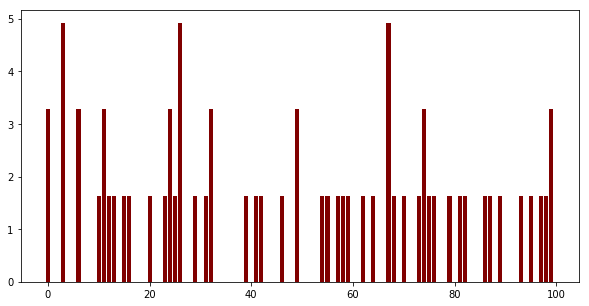

In [29]:
print("how your data look like")
frequency_percentage_of_last_digits = getfrequency_percentage(last_digits,list(range(0,100)))
fig = plt.figure(figsize = (10, 5))
plt.bar(list(range(0,100)),frequency_percentage_of_last_digits,color ='maroon' )

In [30]:
print("(1) Is there a pair (or pairs) that is unaccountably more common than the others?")
print("(2) Are doubled digits (especially 00 and 55) consistently less common than average?")
print("(3) Are descending pairs (10, 21, 32, 43, 54, 65, 76, 87, 98) consistently more common?")

(1) Is there a pair (or pairs) that is unaccountably more common than the others?
(2) Are doubled digits (especially 00 and 55) consistently less common than average?
(3) Are descending pairs (10, 21, 32, 43, 54, 65, 76, 87, 98) consistently more common?
